In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
import torch

/Users/semionn/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
!scp genesis3080_2:/home/ubuntu/pch_benchmarks/twinspect/image_clip_pch_8_4-mirflickr_mfnd-b3ef5e210672947f-metrics.json .

image_clip_pch_8_4-mirflickr_mfnd-b3ef5e21067 100% 1592     9.0KB/s   00:00    


In [13]:
# !docker cp e39cbaf0ee5d:/twinspect/data/image_dhash-mirflickr_mfnd-6159ca05d547c2f6-metrics.json .

Preparing to copy...Copying from container - 0BSuccessfully copied 6.14kB to /Users/semionn/Documents/py_projects/twinspect/data/.


In [11]:
def get_data(metrics_path):
    with open(metrics_path, 'r') as f:
        metrics_json = json.load(f)
    effectiveness = metrics_json['metrics']['effectiveness']
    effectiveness_df = pd.DataFrame(effectiveness)
    return effectiveness_df

In [7]:
def plot_metrics(effectiveness_df, suffix):
    plt.plot(effectiveness_df['threshold'], effectiveness_df['precision'], label='precision' + suffix)
    plt.plot(effectiveness_df['threshold'], effectiveness_df['recall'], label='recall' + suffix)
    plt.plot(effectiveness_df['threshold'], effectiveness_df['f1_score'], label='f1_score' + suffix)

In [8]:
def compare_metrics(metrics_path1, metrics_path2, suffix1, suffix2):
    effectiveness_df1 = get_data(metrics_path1)
    effectiveness_df2 = get_data(metrics_path2)
    plot_metrics(effectiveness_df1, suffix1)
    plot_metrics(effectiveness_df2, suffix2)
    plt.legend()
    plt.show()

In [29]:
dhash_metrics_path = 'image_dhash-mirflickr_mfnd-6159ca05d547c2f6-metrics.json'
iscc_metrics_path = 'image_code_v0_64-mirflickr_mfnd-f16d5e0011554332-metrics.json'
clip_hash_metrics_path = 'image_clip_pch-mirflickr_mfnd-b3ef5e210672947f-metrics.json'
new_clip_metrics_path = 'image_clip_pch_16_4-mirflickr_mfnd-b3ef5e210672947f-metrics.json'
clip_8_4_metrics_path = 'image_clip_pch_8_4-mirflickr_mfnd-b3ef5e210672947f-metrics.json'

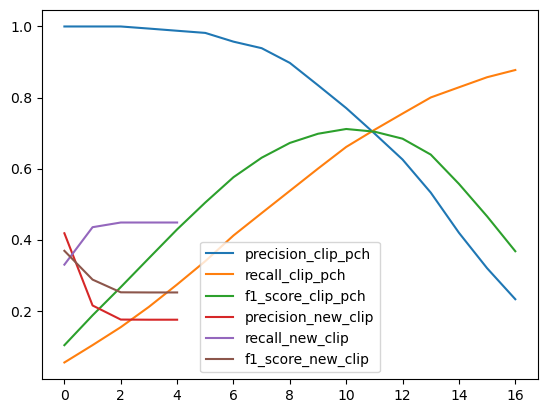

In [32]:
compare_metrics(clip_hash_metrics_path, clip_8_4_metrics_path, '_clip_pch', '_new_clip')

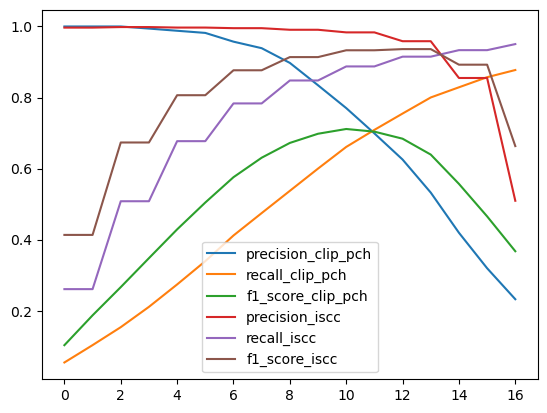

In [23]:
compare_metrics(clip_hash_metrics_path, iscc_metrics_path, '_clip_pch', '_iscc')

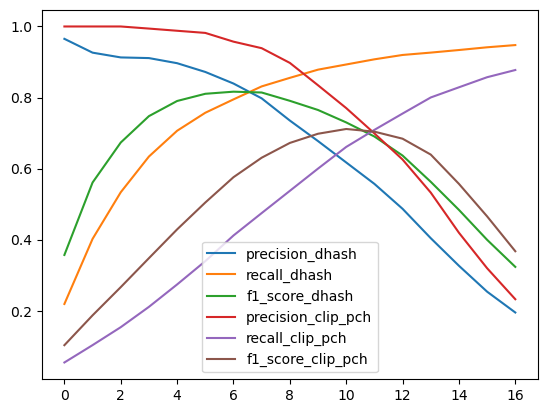

In [24]:
compare_metrics(dhash_metrics_path, clip_hash_metrics_path, '_dhash', '_clip_pch')

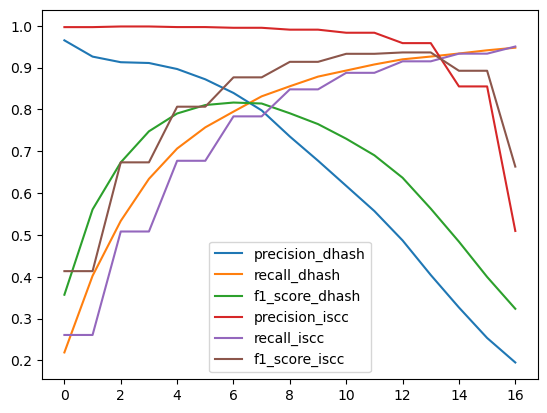

In [15]:
compare_metrics(dhash_metrics_path, iscc_metrics_path, '_dhash', '_iscc')

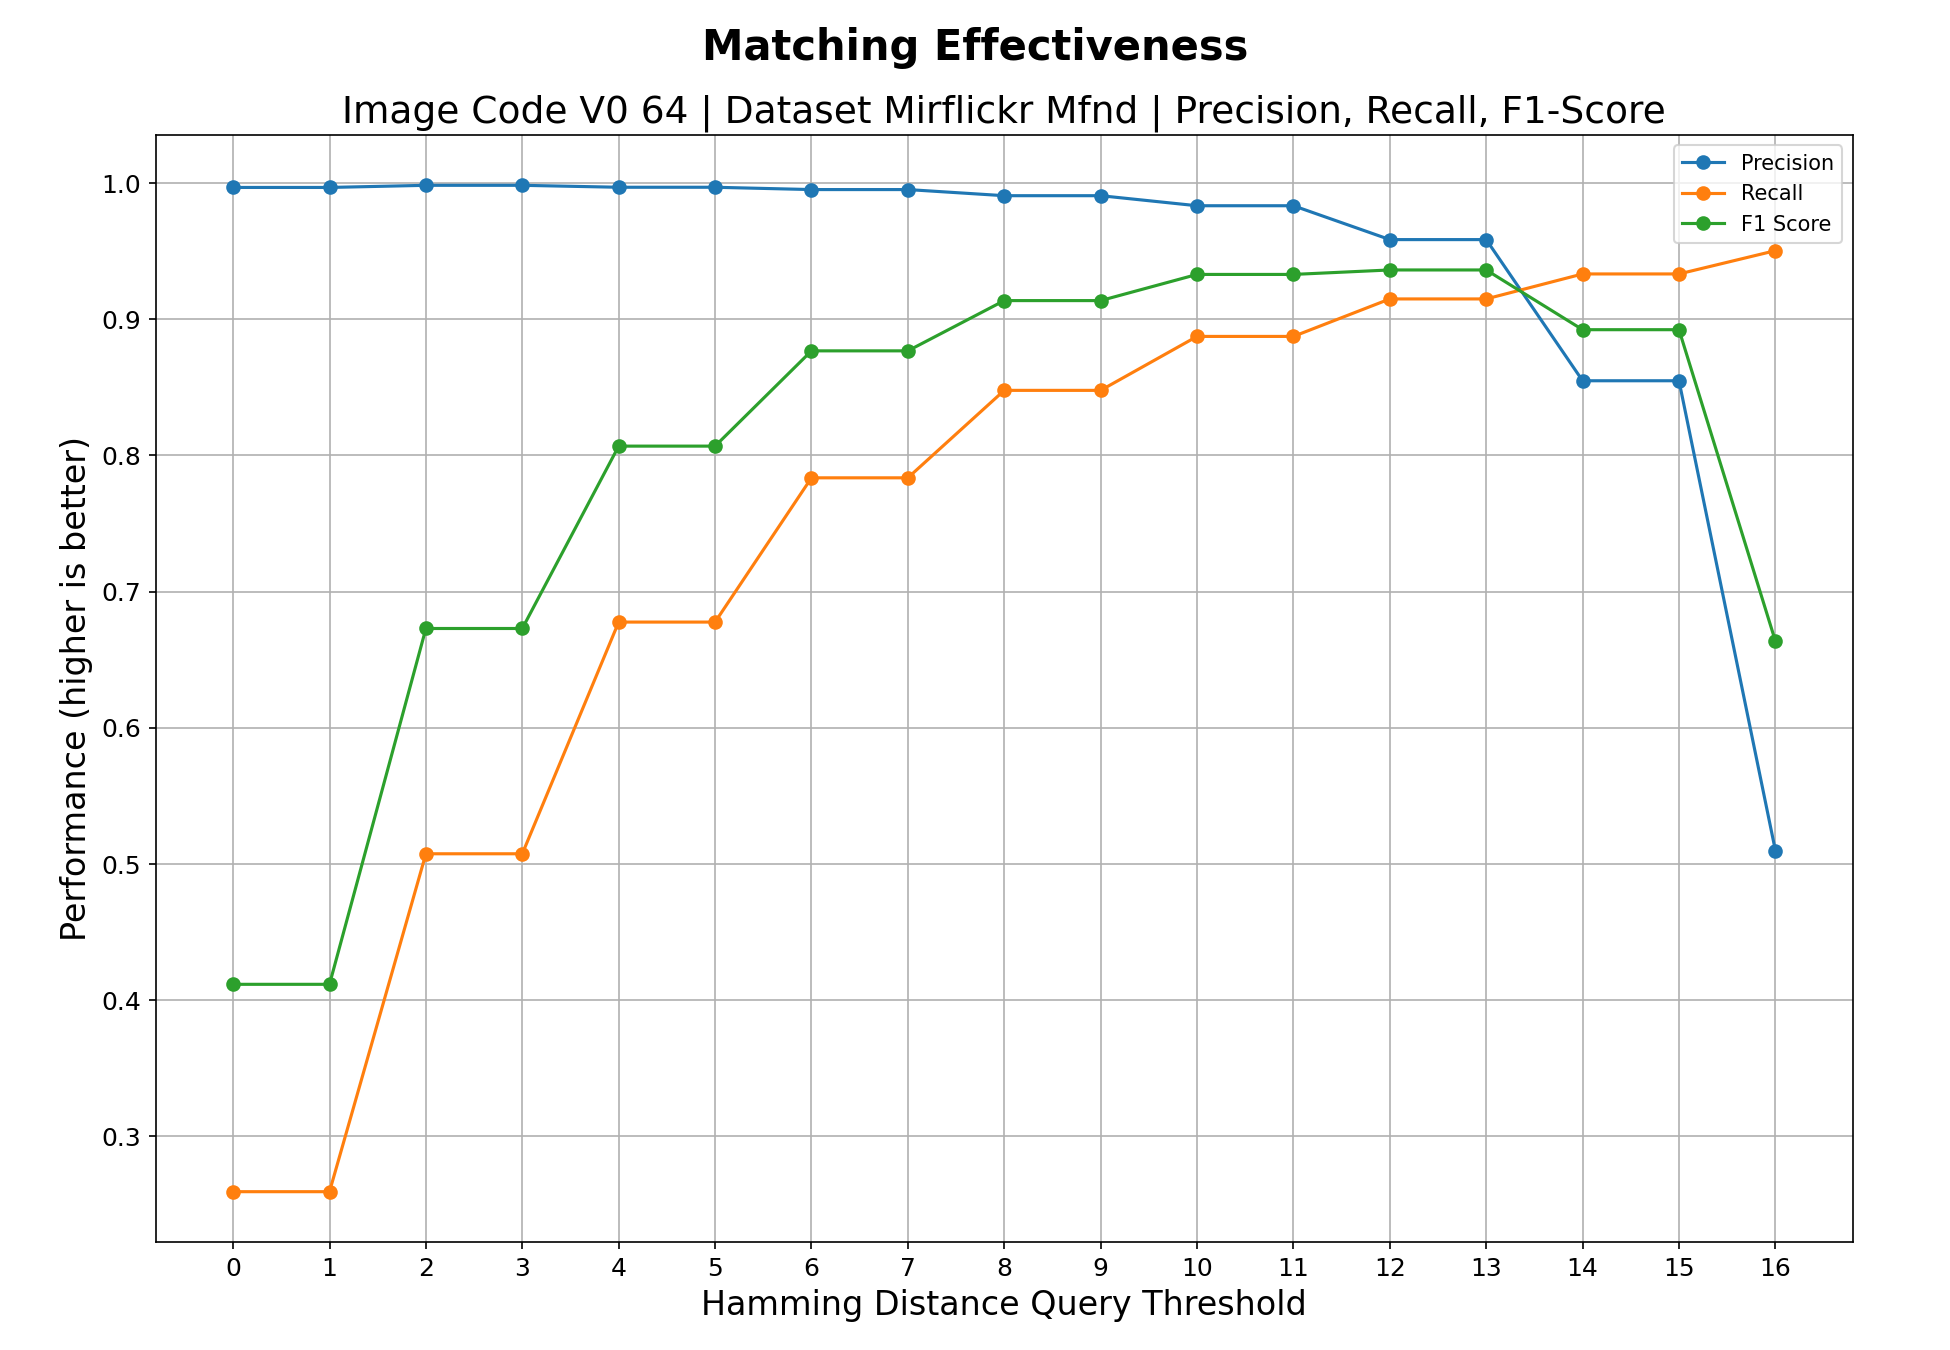


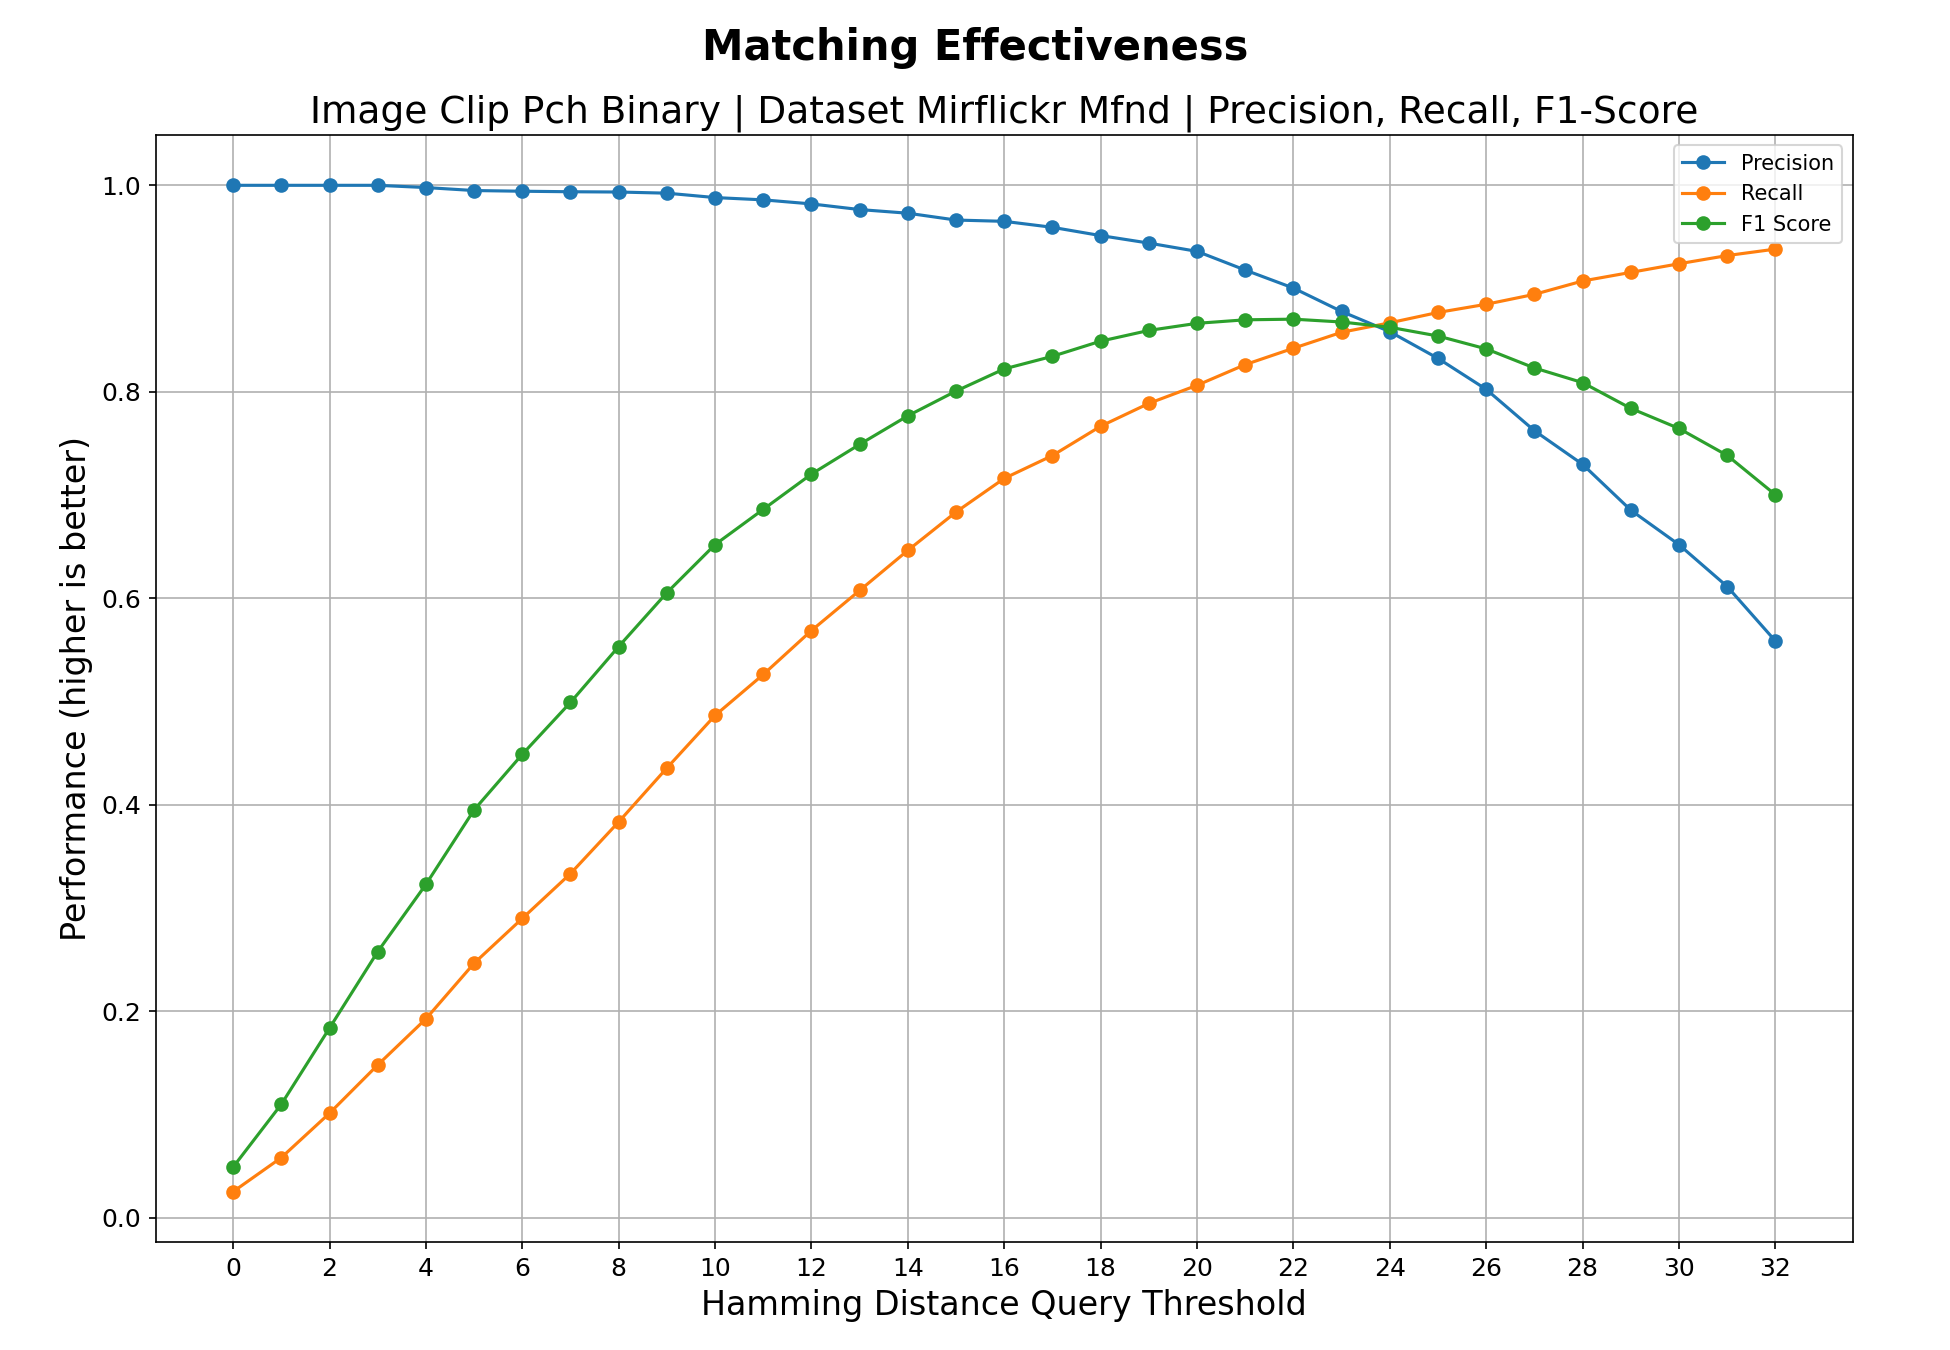
